<font size="5">Build Your Own ANUGA Model (BYOAM) </font>

<font size="3">In this notebook, we will:

- determine the model domain boundaries

- assign a total upstream discharge (m3/s)

    
- download time series of downstream water level




</font>

<font size="3">Before you can run this notebook, you should have run the 2_SetupDEM notebook</font>


<font size=5> Step #1: Mount Google Drive and Grant Access <font> <br>




<font size=3> When you run the next cell, a pop-up window will appear asking you to grant access to your Google Drive. You must approve or the notebook will not work. <font> <br>


In [19]:
import sys
import os
path = os.getcwd() + '/'
where_to_mount = '/content/drive/'

from google.colab import drive
drive.mount(where_to_mount, force_remount=True)

mounted_drive = where_to_mount + 'MyDrive/'

Mounted at /content/drive/


<font size=5> Step #2: Install packages. <font> <br>
<font size=3> This cell should install all Python packages you need for each tutorial.<font>

In [22]:
import os
os.chdir(mounted_drive)
if os.path.isdir(mounted_drive + 'komo_estuary_tutorial'):
  print('## Updating the local git repository \n')
  os.chdir(mounted_drive + '/komo_estuary_tutorial')
  ! git pull 
else:
  print('## Pulling the git repository with files for the tutorial\n')
  ! git clone https://github.com/achri19/komo_estuary_tutorial.git

print('\n## Installing the Python packages needed for these tutorials\n')
!/bin/bash $mounted_drive/komo_estuary_tutorial/install_packages.sh


## Updating the local git repository 

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/achri19/komo_estuary_tutorial
   f355abb..4bc3f86  main       -> origin/main
Updating f355abb..4bc3f86
Fast-forward
 komo_tides_lat0.28_lon9.03_20100101.csv | 102984 +++++++++++++++++++++++++++++
 1 file changed, 102984 insertions(+)
 create mode 100644 komo_tides_lat0.28_lon9.03_20100101.csv

## Installing the Python packages needed for these tutorials

/content/drive/MyDrive//komo_estuary_tutorial/install_packages.sh: line 4: cd: /content/drive/MyDrive/installations: No such file or directory
(1) Install pip packages
nose mpi4py triangle Pmw pymetis cmocean geopandas fiona pygeos rasterio rasterstats
(2) Install gdal
(3) Install netcdf4
(4) Download anuga_core github repository
https://github.com/Ge

<font size=5> Step #3: Set up working directories<font> 


<font size=3> We will access data files stored on a shared Google Drive. You will also need to save files to your own Google Drive.<font>



In [3]:
path = where_to_mount + 'MyDrive/processing/'
path_code = path + 'code/'
path_templates = path +  'templates/'
path_configs = path + 'configs/'
path_ancillary = path + 'ancillary/'
sys.path.insert(1,path_code)


<font size=5> Step #4: Now we will import Python packages, which will be used for future tutorials. If there are any errors, try rerunning the first cell <font> 




In [4]:
import sys
import os
import pandas as pd
import shutil
from datetime import datetime
from string import Template
import fnmatch
import geopandas as gpd
import rasterio
from osgeo import gdal 
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import rtree
import pygeos
import pyTMD


In [5]:
sys.path.insert(1,path_code)

from BYOM_Utilities_V1 import (build_directory,
                               get_extent_parameters,
                               setup_AOI_files, 
                               make_polygons,
                               make_channel_networks,
                               make_model_foundation, get_inlet,
                               set_boundary_conditions, get_tidal_boundary,get_tide_data_pytmd,
                               make_watermask,
                               more_opening)

<font size='5' color = 'red' > Set Boundaries <br> Set the AOI again and make sure the working directory is set. If you ran 2_Setup_DEM notebook then the directory should already be made. </font>


In [6]:
AOI = 'komo'

Path((mounted_drive + AOI)).mkdir(parents=True, exist_ok=True)

skip = False
res = 30 #meters
print('\n')
print('Study area is ' + AOI)
print('Resolution of this setup is %sm' %(res))

working_path,folders = build_directory(mounted_drive, AOI)

elev_name = 'Elevation_ocean-GEBCO_land-GLO30_above1260m-wdpower_below1260m-plane_wetland-uni0m_lakes-uni1m'
elevationpath = '/content/drive2/MyDrive/examples/komo/DEMs/Elevation_ocean-GEBCO_land-GLO30_above1260m-wdpower_below1260m-plane_wetland-uni0m_lakes-uni1m'





Study area is komo
Resolution of this setup is 30m



##############################################################################################
################################[Step 1][Build Directory]#####################################
##############################################################################################

##################### The working directory set as: 

/content/drive/MyDrive/komo/
 
##################### Folders are:
##################### 0 User_Defined_Files --> User shapefile of model domain and water mask
##################### 1 tmp --> For temporary files
##################### 3 Meshes --> Where we will build model meshes
##################### 4 DEMs --> Where we will build digital elevation models
##################### 5 Boundaries --> Where we will store boundary files
##################### 6 Simulations --> Where we will run simulations
##################### 7 Setup_Files/Setup_SHP --> Shapefiles for setup 
##################### 8 Setup_F

In [7]:
parameters = pd.read_csv('%s/%s_Configuration.csv' %(folders[2],AOI))
EPSG = int(parameters['EPSG'])

<font size='5' color = 'red' > Set Boundaries STEP #8a: <br> Get the downstream boundary conditions for the model </font>


In [24]:
tideLAT_EPSG = -9999
tideLON_EPSG = -9999

[]

In [25]:
boundary_segments,tideLON_EPSG,tideLAT_EPSG = get_tidal_boundary(AOI,folders,res,parameters,tide_bnd_EPSG,tideLAT_EPSG,tideLON_EPSG,elev_name)





##############################################################################################
##############################[Step 8A][Get Tidal Boundary]###############################
##############################################################################################


[Step 8A][Get Tidal Boundary][Find Tidal Boundary] .......


[Step 8A][Set_Boundary_Conditions][Deepest model side = downstream boundary, tidal conditions] .......


[Step 8A][Get Tidal Boundary] Finished .......



[]

In [26]:
tides = gpd.GeoDataFrame(geometry = gpd.points_from_xy(x=[tideLON_EPSG],y=[tideLAT_EPSG]),crs='EPSG:%s' %(EPSG))

print('Tide centroid in EPSG %s is LAT: %s LON: %s ' %(EPSG,tideLAT_EPSG,tideLON_EPSG))

tideLON_4326 = round(tides.to_crs('EPSG:4326').geometry[0].coords.xy[0][0],4)
tideLAT_4326 = round(tides.to_crs('EPSG:4326').geometry[0].coords.xy[1][0],4)

print('Tide centroid in EPSG 4326 is LAT: %s LON: %s ' %(tideLAT_4326,tideLON_4326))


Tide centroid in EPSG 32232 is LAT: 31223.17 LON: 502794.61 
Tide centroid in EPSG 4326 is LAT: 0.2825 LON: 9.0253 


In [27]:
tide_path = folders[5] + '/Tide_LAT%s_LON%s/' %(tideLAT_4326,tideLON_4326)

Path(tide_path).mkdir(parents=True, exist_ok=True)

boundary_segments.to_file('%s%s_Boundary_Segments.shp' %(tide_path,AOI))

Due to file size and copyright, we cannot share the model files for the TPXO Global Tide model. We have provided the time series needed to run a simulation, but if you'd like to produce tide data yourself, you should look here for more information: [https://www.tpxo.net/global](https://)

<font size='5' color = 'red' > Set Boundaries STEP #8b: <br> Get the upstream boundary conditions for the model </font>


In [28]:
##tide_data = get_tide_data_pytmd(AOI,tide_path,tideLON_4326,tideLAT_4326)
tide_data = np.genfromtxt("%s/%s_tides_lat%s_lon%s_20100101.csv" %(mounted_drive+'komo_estuary_tutorial/',AOI,np.round(tideLAT_4326,2),np.round(tideLON_4326,2)),delimiter=',')


In [29]:
inletLAT_EPSG = -9999
inletLON_EPSG = -9999



In [30]:
intersections, inletLON_EPSG,inletLAT_EPSG = get_inlet(AOI,folders,res,parameters,inletLON_EPSG,inletLAT_EPSG,elev_name)




##############################################################################################
##############################[Step 8b][Get Inlet Location]###############################
##############################################################################################


[Step 8b][Get Inlet Location][Find River Boundary] .......


[Step 8b][Get Inlet Location][Largest river channel along model edge = upstream boundary, river discharge conditions] .......

##################### Discharge boundary conditions set at 608911,19092

[Step 8b][Get Inlet Location] Finished .......



In [31]:
inlet_bnd = gpd.GeoDataFrame(geometry = gpd.points_from_xy(x=[inletLON_EPSG],y=[inletLAT_EPSG]),crs='EPSG:%s' %(EPSG))

print('Inlet centroid is LAT: %s LON: %s ' %(inletLAT_EPSG,inletLON_EPSG))

inletLAT_4326 = round(inlet_bnd.to_crs('EPSG:4326').geometry[0].coords.xy[1][0],4)
inletLON_4326 = round(inlet_bnd.to_crs('EPSG:4326').geometry[0].coords.xy[0][0],4)

print('Inlet centroid is LAT: %s LON: %s ' %(inletLAT_4326,inletLON_4326))


Inlet centroid is LAT: 19092 LON: 608911 
Inlet centroid is LAT: 0.1727 LON: 9.9789 


In [32]:
inlet_path = folders[5] + '/Inlet_LAT%s_LON%s/' %(inletLAT_4326,inletLON_4326)

Path(inlet_path).mkdir(parents=True, exist_ok=True)

inlet_bnd.to_file('%sinlet_bnd_LAT%s_LON%s.shp' %(inlet_path,inletLAT_4326,inletLON_4326))



<font size='5' color = 'red' > Make some plots! </font>


In [41]:
from rasterio.mask import mask
AOI_extent = gpd.read_file('%s%s_extent_%s.shp' %(folders[7],AOI,EPSG))
watermask = rasterio.open('%s%s_watermask_%s.tif' %(folders[8],AOI,res))
masked, mask_transform = mask(dataset=watermask,shapes=AOI_extent.geometry,crop=False)
masked = np.where(masked==-9999,np.nan,masked)

origin_x = watermask.profile['transform'][2]
origin_y = watermask.profile['transform'][5]
tides = gpd.GeoDataFrame(geometry = gpd.points_from_xy([tideLON_EPSG],[tideLAT_EPSG]),crs='EPSG:%s' %(EPSG))


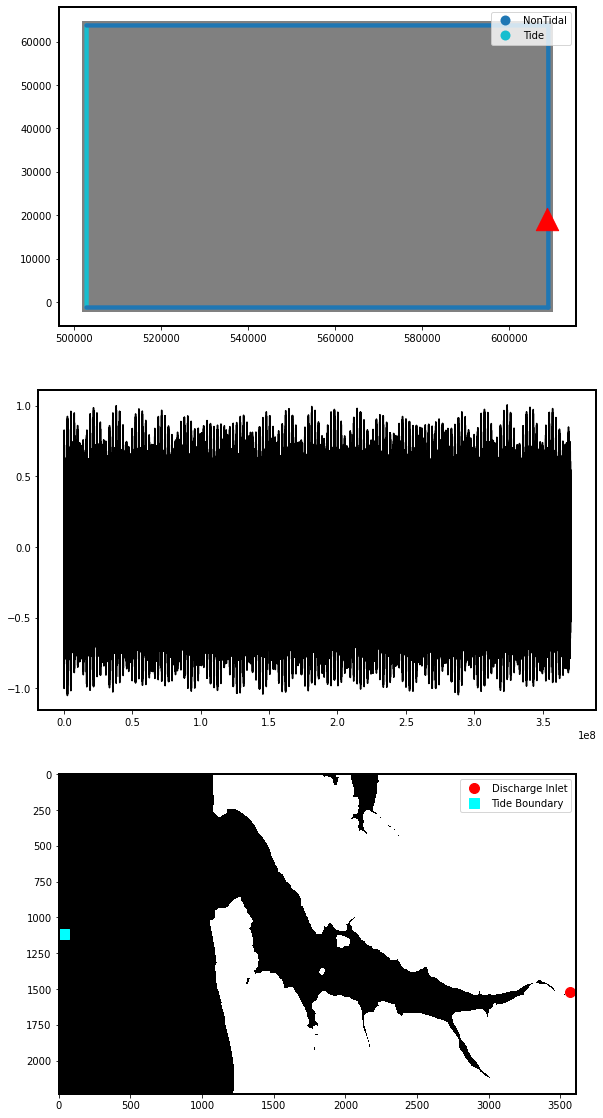

In [42]:
fig,[ax1,ax2,ax3] = plt.subplots(nrows=3,figsize=(10,20))

AOI_extent.plot(ax=ax1,color='grey',legend = True,label='model domain')
boundary_segments.plot(ax=ax1,categorical=True,legend=True,column='boundary')
ax1.scatter(inletLON_EPSG,inletLAT_EPSG,color='red',marker='^',s=500,label='Inlet')

ax2.plot(tide_data[:,0],tide_data[:,1],'black')

ax3.imshow(masked[0],'gray')
ax3.scatter((inletLON_EPSG-origin_x)/res,(origin_y - inletLAT_EPSG)/res, s=100, c='red', marker='o',label='Discharge Inlet')
ax3.scatter((tides.geometry[0].coords[0][0]-origin_x)/res,(origin_y - tides.geometry[0].coords[0][1])/res, s=100, c='cyan', marker='s',label='Tide Boundary')
ax3.legend()

plt.savefig('%s/%s_model_boundaries_TideLAT%s_TideLON%s_InletLAT%s_InletLON%s.png' %(folders[5],AOI,tideLAT_4326,tideLON_4326,inletLAT_4326,inletLON_4326),bbox_inches='tight')

This should produce a file that can also be run on gattaca.
